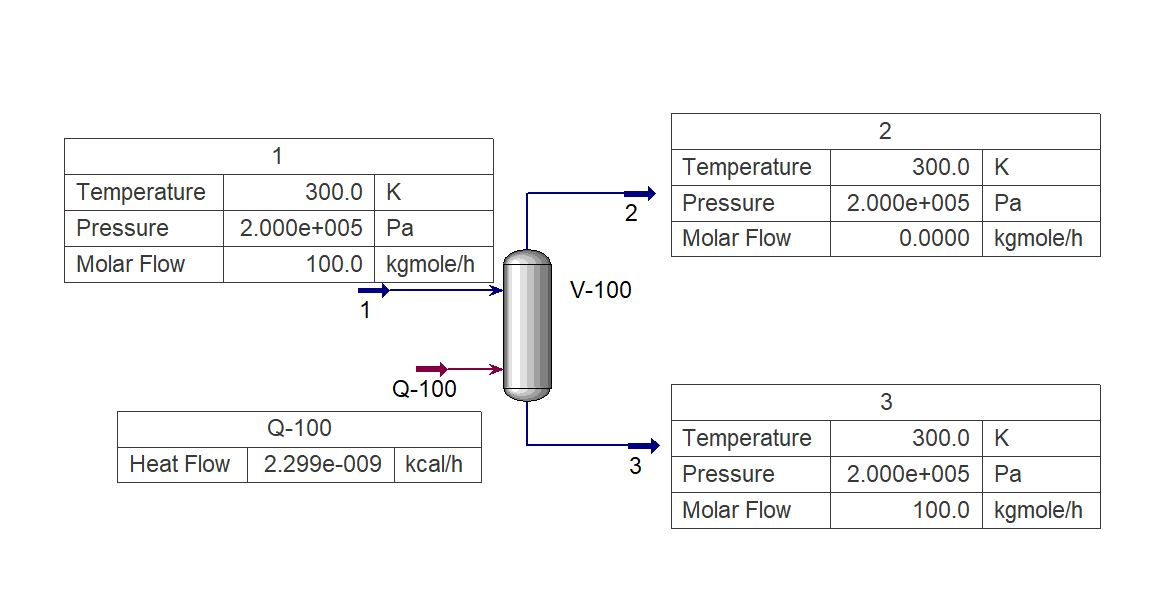

In [1582]:
from IPython.display import Image
Image(filename='Capture.jpg') 

In [1583]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import contextlib
import io
# Developed Library
from Database import COMP_DB, check_sanity
from Flash import Stream, UOP, Q_Flash, PENG_ROBINSON
# from Utility 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1584]:
print(COMP_DB)

{'critical':              omega          bp            pc          tc       vc          mw
component                                                                    
benzene    0.21500  353.229014  4.924389e+06  562.088022  0.25999   78.110001
toluene    0.25960  383.789011  4.100039e+06  591.789011  0.31600   92.140800
o-xylene   0.30230  417.565012  3.732809e+06  630.362009  0.36912  106.166000
m-xylene   0.32600  412.255015  3.541119e+06  617.039011  0.37573  106.166000
p-xylene   0.32589  411.500010  3.510789e+06  616.250010  0.37906  106.166000
...            ...         ...           ...         ...      ...         ...
n-c15      0.70599  543.758005  1.516810e+06  706.990000  0.87998  212.410004
n-c14      0.67900  526.648020  1.620180e+06  693.990000  0.82999  198.380005
n-c13      0.62300  508.569010  1.723530e+06  675.789011  0.77999  184.367004
n-c12      0.56199  489.418009  1.829920e+06  658.289011  0.71297  170.339005
n-c11      0.53500  469.030009  1.964930e+06  638.2

In [1585]:

# Component in Scope for the calculation
comp1= {'benzene': 0.2,
      'toluene': 0.3,
      'o-xylene': 0.5}
comp2= {'n-butane': 0.15,
      'n-pentane': 0.25,
      'n-hexane': 0.35,
      'n-c15':0.25}
# check for consistency of the component list
check_sanity(comp1)
check_sanity(comp2)
    


Sanity check completed successfully.
Sanity check completed successfully.


In [1586]:
# create a stream from the component list
s1 = Stream(name="s1", composition=comp1, temperature=420, pressure=2e5, flowrate=100)
s2 = Stream(name="s2",composition=comp2, temperature=400, pressure=1e5, flowrate=100)

### Adiabatic Flash

In [1587]:
# Wrap the streams with EOS solver
s1 = PENG_ROBINSON(s1)
s2 = PENG_ROBINSON(s2)

##### Parameters Calculation:
Temperature: 420, Pressure: 200000.0
Tr: [0.74721393 0.7097124  0.66628381], alpha: [1.19697097 1.25270117 1.32242318], a: [2.42719221 3.3818748  4.44916968], b: [7.38314817e-05 9.33616470e-05 1.09230481e-04]
#####
Two phase
Calculated beta:0.44205906578756526
Willson: xi:[0.11394675 0.26602525 0.620028  ], yi:[0.30861135 0.34288093 0.34850772], K: [2.70838213 1.28890372 0.56208385], beta:0.44205906578756526
Two phase
Calculated beta:0.44205906578756526
Willson: xi:[0.11394675 0.26602525 0.620028  ], yi:[0.30861135 0.34288093 0.34850772], K: [2.70838213 1.28890372 0.56208385], beta:0.44205906578756526
A: 0.06393071379260401, B: 0.005783438681218405, a_mix: 3.8976081871034154, b_mix: 0.00010097536931086462
Z roots: [0.93893529 0.04779128 0.00748999]
##### Z-factor Calculation:
Z_l: 0.007489990910912982, Z_v: 0.9389352909335368
#####
##### Fugacity Coefficient Calculation:
Z: 0.007489990910912982, x_or_y: [0.11394675 0.26602525 0.620028  ], A: 0.063930713792

In [1588]:
# get the simple flash result
s1.basic_info()

### Post Flash Results for Stream:s1 ###
T:, 420 K, P: 200000.0 Pa, F: 100 mol/hr
Z_l: 0.0075, Z_v: 0.9474, phi_l: [2.45 1.2  0.53], phi_v: [0.97 0.95 0.93]
K: [2.539  1.265  0.5709]
VF: 0.41, xi: [0.1226 0.2706 0.6068], yi: [0.3113 0.3423 0.3464]
h_l: [19373.43] J/mol, h_v: [67478.93] J/mol, h: [39109.27] J/mol
###


### TXY Plot

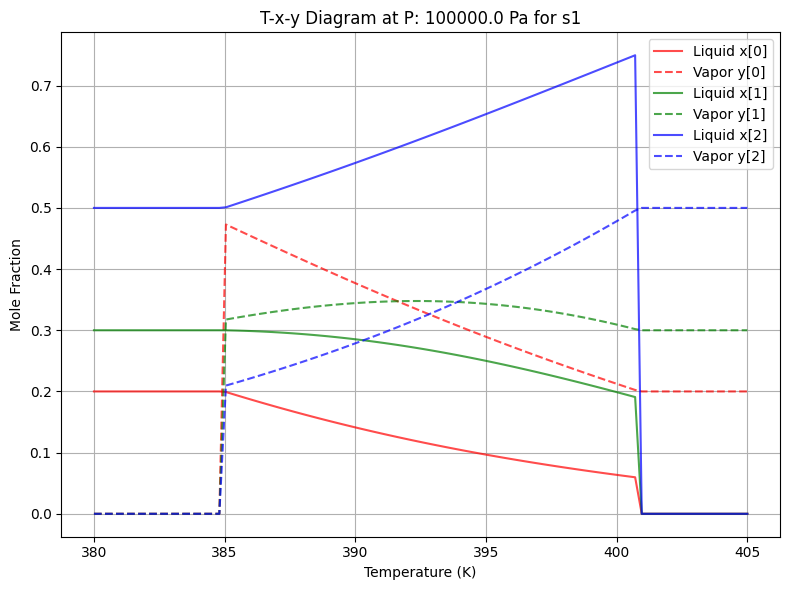

In [1589]:
from Utility import plot_TXY
# TXY plot for s2
with contextlib.redirect_stdout(io.StringIO()):
    plot_TXY(s1, P=1e5, T_min=380, T_max=405, T_step=100)


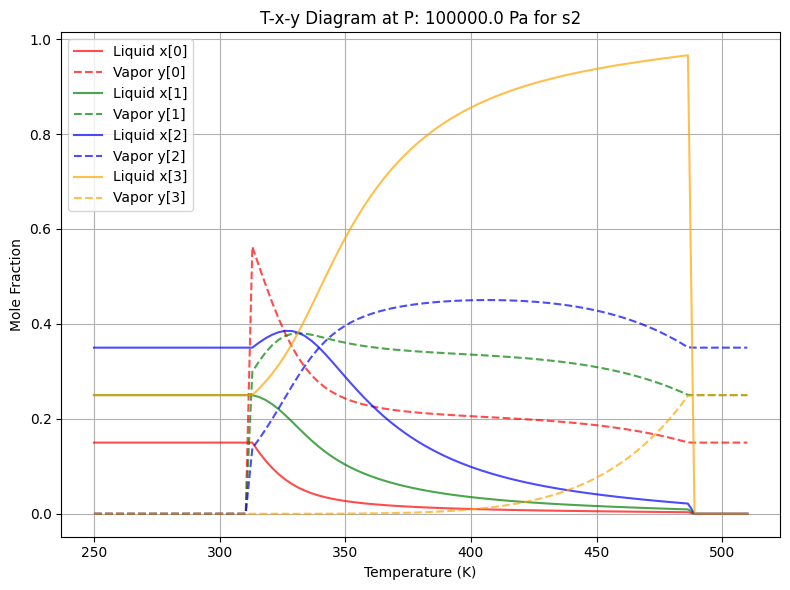

In [1590]:
from Utility import plot_TXY
# TXY plot for s2

with contextlib.redirect_stdout(io.StringIO()):
    plot_TXY(s2, P=1e5, T_min=250, T_max=510, T_step=100)

### PXY Plot

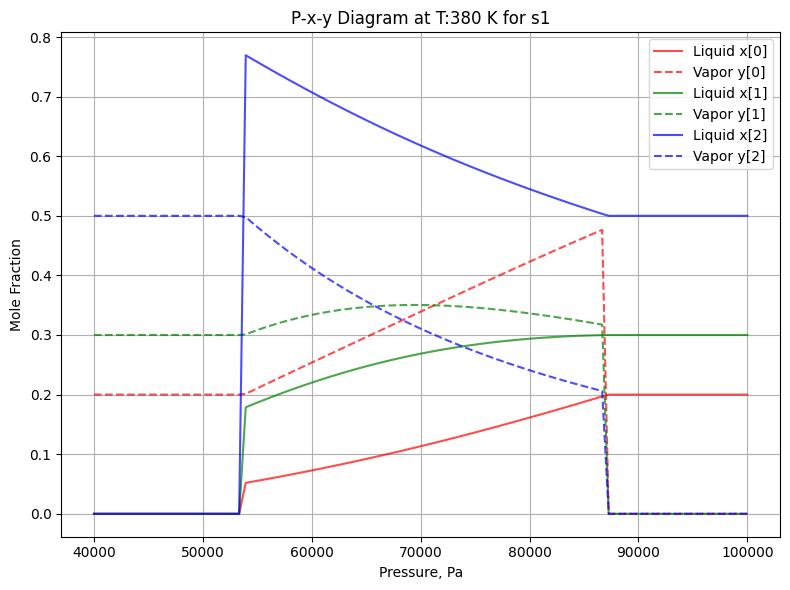

In [1591]:
from Utility import plot_PXY
# PXY plot for s1
with contextlib.redirect_stdout(io.StringIO()):
    plot_PXY(s1, T=380, P_min=0.4e5, P_max=1e5, P_step=100)


### Why need np.roots() and why not fsolve

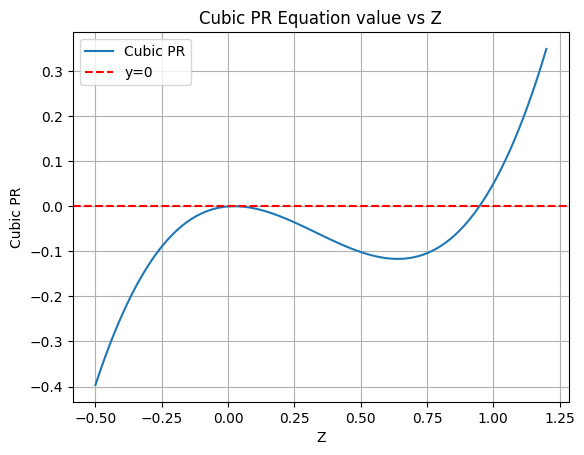

In [1592]:
s1.solver.plot_cubic_PR(s1.A, s1.B)

## Non-Adiabatic Flash

##### Parameters Calculation:
Temperature: 350.0, Pressure: 200000.0
Tr: [0.62267827 0.591427   0.55523651], alpha: [1.3140309  1.38013858 1.45929967], a: [2.66456386 3.72591323 4.9096779 ], b: [7.38314817e-05 9.33616470e-05 1.09230481e-04]
#####
Single phase: Liquid
A: 0.09570859271272295, B: 0.00669370292963083, a_mix: 4.052071162533681, b_mix: 9.739003077466377e-05
Z roots: [0.90302376 0.08226592 0.00801662]
##### Z-factor Calculation:
Z_l: 0.008016620441613371, Z_v: 0.9030237610231858
#####
##### Fugacity Coefficient Calculation:
Z: 0.008016620441613371, x_or_y: [0.2, 0.3, 0.5], A: 0.09570859271272295, B: 0.00669370292963083, a_mix: 4.052071162533681, b_mix: 9.739003077466377e-05
ln_phi: [-0.7863932  -1.73298949 -2.82558101]
phi: [0.45548468 0.17675521 0.05927421]
#####
A: 0.09570859271272295, B: 0.00669370292963083, a_mix: 4.052071162533681, b_mix: 9.739003077466377e-05
Z roots: [0.90302376 0.08226592 0.00801662]
##### Z-factor Calculation:
Z_l: 0.008016620441613371, Z_v: 0.903023

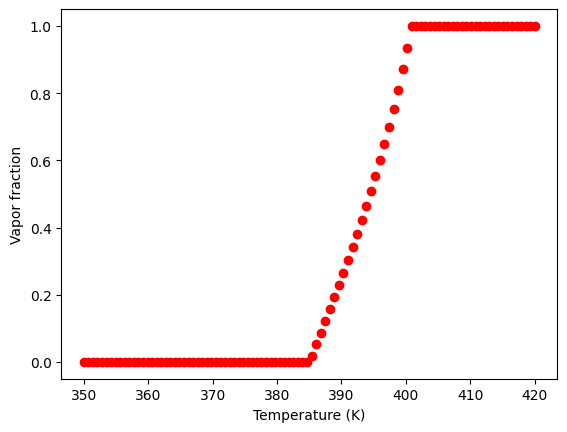

In [1593]:
import matplotlib.pyplot as plt
for T in np.linspace(350,420,100):
    s1.T = T
    s1.P = 1e5
    plt.xlabel('Temperature (K)')
    plt.ylabel('Vapor fraction')
    plt.plot( T, s1.vf,'ro')
    plt


In [1594]:
from UnitOperation import Heater
with contextlib.redirect_stdout(io.StringIO()):
    # Give some duty to the stream
    s1.T, s1.P, s1.flowrate = 300, 2e5, 100
    h1 = Heater(s1, dP=0.1e5, dT=120)
h1.basic_info()


### Heater Unit Operation ###
Feed Stream: s1
Outlet Stream: s1
Heat Duty: [4066.35] kJ/h
Pressure Drop: -10000.0 Pa
Temperature Change: 120 K
#############################


In [1595]:
# product Stream of s1
h1.ps.basic_info()

### Post Flash Results for Stream:s1 ###
T:, 420 K, P: 190000.0 Pa, F: 100 mol/hr
Z_l: 0.0071, Z_v: 0.949, phi_l: [2.58 1.27 0.56], phi_v: [0.97 0.95 0.94]
K: [2.6685 1.328  0.5986]
VF: 0.55, xi: [0.1043 0.2542 0.6415], yi: [0.2784 0.3376 0.384 ]
h_l: [17132.71] J/mol, h_v: [64927.03] J/mol, h: [43392.48] J/mol
###


In [1596]:
# Let say we want to increast the temperature and want to know the duty required
# and ofcourse the new stream phase composition and vapor fraction
with contextlib.redirect_stdout(io.StringIO()):
    h2 = Heater(h1.ps, dP=0.7e5, dT=20)
    
h2.basic_info()
h2.ps.basic_info()

### Heater Unit Operation ###
Feed Stream: s1
Outlet Stream: s1
Heat Duty: [-258.89] kJ/h
Pressure Drop: -70000.0 Pa
Temperature Change: 20 K
#############################
### Post Flash Results for Stream:s1 ###
T:, 440 K, P: 120000.0 Pa, F: 100 mol/hr
Z_l: 0.0043, Z_v: 0.9705, phi_l: [5.8  3.   1.42], phi_v: [0.98 0.97 0.97]
K: [5.9067 3.0814 1.4732]
VF: 1, xi: [0. 0. 0.], yi: [0.2 0.3 0.5]
h_l: 0 J/mol, h_v: [40803.56] J/mol, h: [40803.56] J/mol
###


## Validation with HYSYS Result

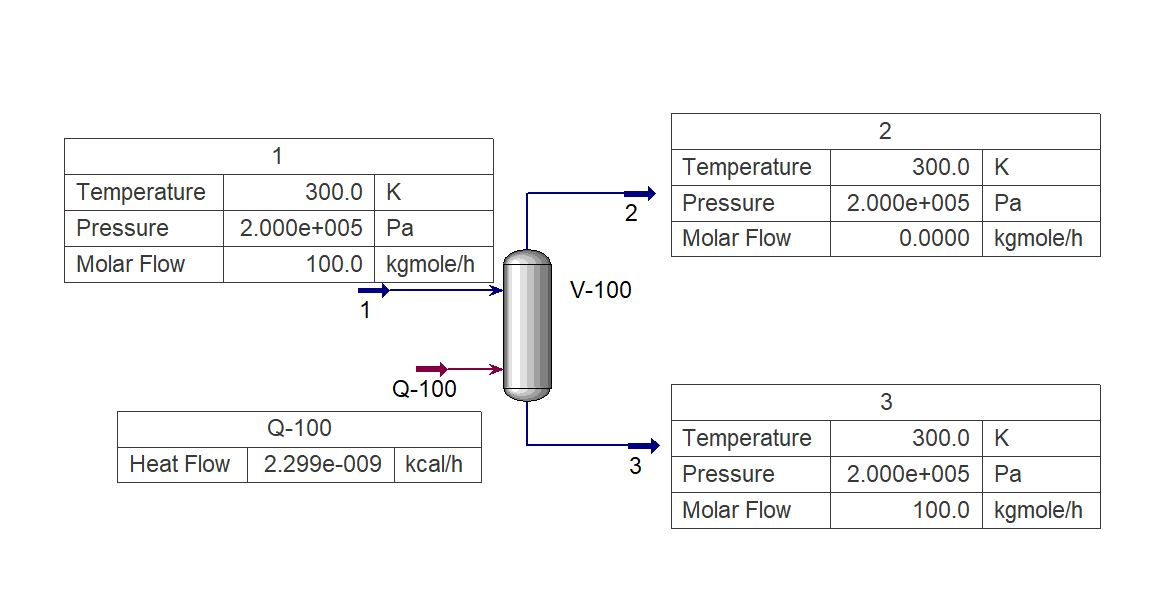

In [1597]:
from IPython.display import Image
Image(filename='Capture.jpg') 

In [1598]:



# load HYSYS run Data from excel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

hysys_data = pd.read_excel('HYSYSResult.xlsx', sheet_name='Selected')
hysys_data.head()

,"dP, Pa","dT, K",K1,K2,K3,beta,x1,x2,x3,Z_v,Z_l,"Q, kJ/hr"
0,0.0,114,2.261035,1.109170,0.491326,0.071354,0.1835,0.2977,0.5188,0.9486,0.007387,2255110.0
1,0.0,116,2.351737,1.159410,0.516725,0.178000,0.1612,0.2917,0.5471,0.9482,0.007420,2630892.0
2,0.0,118,2.443262,1.211178,0.543293,0.289900,0.1410,0.2827,0.5763,0.9478,0.007451,3027156.0
3,0.0,120,2.538712,1.264499,0.570722,0.409400,0.1227,0.2707,0.6066,0.9474,0.007481,3451844.0
4,0.0,122,2.634995,1.319656,0.599247,0.539200,0.1063,0.2559,0.6378,0.9470,0.007510,3914988.0


In [1599]:
# run Heater against s1 stream for different cases and keep data record

# Ensure the required columns exist in the DataFrame
if not {'c_K1', 'c_K2', 'c_K3', 'c_beta', 'c_x1', 'c_x2', 'c_x3', 'c_Z_l', 'c_Z_v'}.issubset(hysys_data.columns):
    hysys_data[['c_K1', 'c_K2', 'c_K3', 'c_beta', 'c_x1', 'c_x2', 'c_x3', 'c_Z_l', 'c_Z_v']] = np.nan


with contextlib.redirect_stdout(io.StringIO()):
    s1.composition = {'benzene': 0.2, 'toluene': 0.3, 'o-xylene': 0.5}
    s1.T, s1.P, s1.flowrate = 300, 2e5, 100

    for i in hysys_data.index:
        dP = hysys_data['dP, Pa'].iloc[i]
        dT = hysys_data['dT, K'].iloc[i]
        s1.T, s1.P, s1.flowrate = 300, 2e5, 100
        h1 = Heater(s1, dP=dP, dT=dT)

        hysys_data.loc[i, ['c_K1', 'c_K2', 'c_K3']] = h1.ps.K[0], h1.ps.K[1], h1.ps.K[2]
        hysys_data.loc[i, 'c_beta'] = h1.ps.vf
        hysys_data.loc[i, ['c_x1', 'c_x2', 'c_x3']] = h1.ps.x_i[0], h1.ps.x_i[1], h1.ps.x_i[2]
        hysys_data.loc[i, ['c_Z_l', 'c_Z_v']] = h1.ps.Z_l, h1.ps.Z_v
        hysys_data.loc[i, 'c_Q'] = h1.dH

pd.set_option('display.max_columns', None) 
hysys_data.tail().round(4)

,"dP, Pa","dT, K",K1,K2,K3,beta,x1,x2,x3,Z_v,Z_l,"Q, kJ/hr",c_K1,c_K2,c_K3,c_beta,c_x1,c_x2,c_x3,c_Z_l,c_Z_v,c_Q
120,147099.75,70,3.0586,1.2852,0.4739,0.3396,0.1177,0.2735,0.6088,0.9816,0.0021,2333694.0,3.0594,1.2854,0.4742,0.3403,0.1176,0.2734,0.6090,0.0021,0.9816,2.430653e+06
121,147099.75,72,3.2248,1.3637,0.5070,0.4487,0.1001,0.2579,0.6420,0.9814,0.0021,2750022.0,3.2252,1.3641,0.5073,0.4494,0.1000,0.2578,0.6422,0.0021,0.9814,2.825265e+06
122,147099.75,74,3.3943,1.4459,0.5422,0.5687,0.0847,0.2393,0.6760,0.9812,0.0021,3210658.0,3.3974,1.4464,0.5423,0.5695,0.0846,0.2392,0.6763,0.0021,0.9812,3.262988e+06
123,147099.75,76,3.5752,1.5321,0.5790,0.7042,0.0711,0.2182,0.7107,0.9810,0.0021,3731486.0,3.5762,1.5326,0.5793,0.7051,0.0710,0.2181,0.7109,0.0021,0.9810,3.761062e+06
124,147099.75,78,3.7584,1.6221,0.6180,0.8621,0.0592,0.1953,0.7455,0.9808,0.0021,4338840.0,3.7617,1.6227,0.6182,0.8632,0.0591,0.1951,0.7458,0.0021,0.9808,4.345749e+06


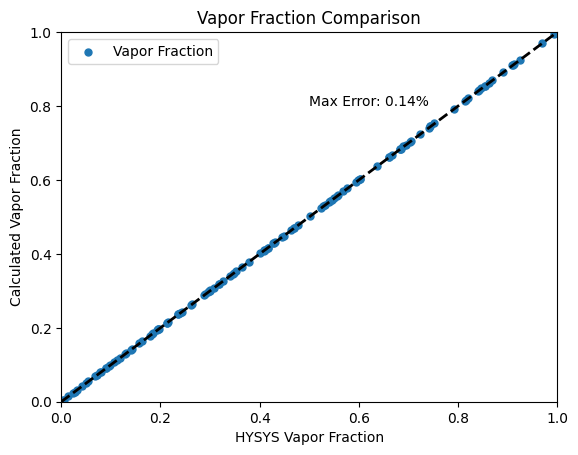

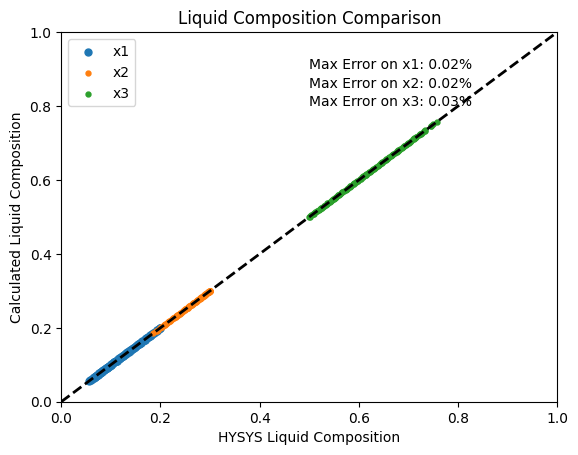

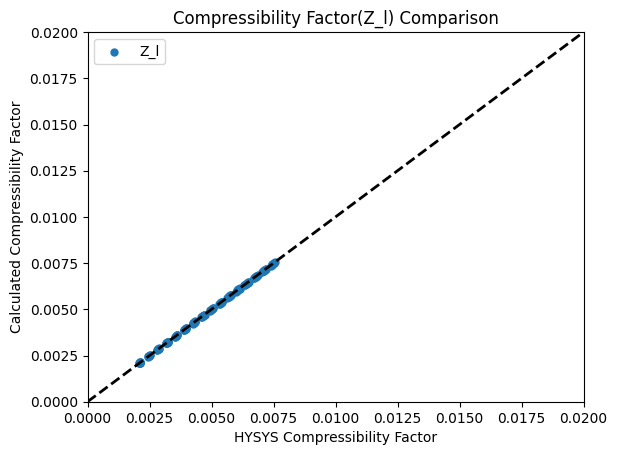

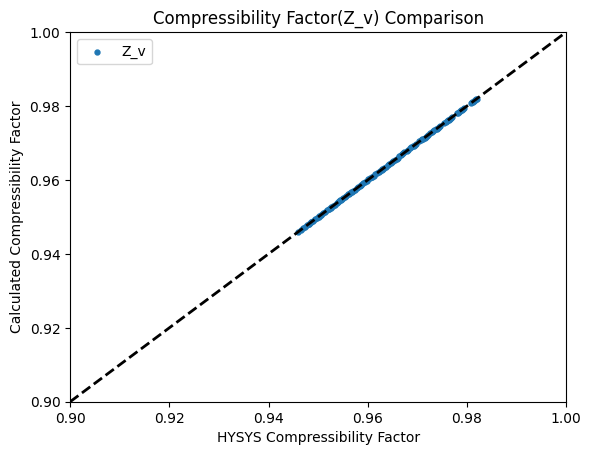

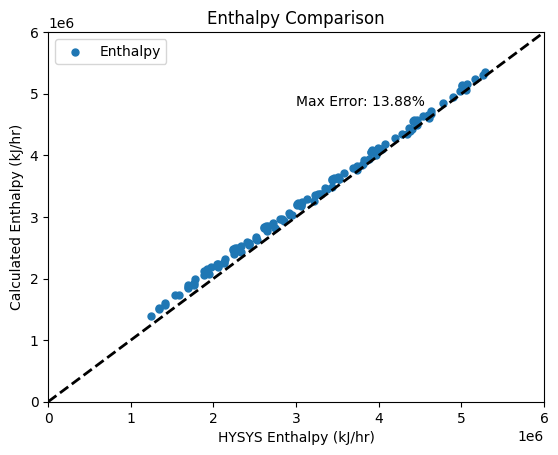

In [1603]:
# plot for vapor fraction
betaErrorMax = max(np.abs(hysys_data['beta'] - hysys_data['c_beta']) * 100)
# plt.scatter(hysys_data['beta'], betaErrorMax, label='Vapor Fraction Error', marker='.', s=100)

plt.scatter(hysys_data['beta'], hysys_data['c_beta'], label='Vapor Fraction', marker='.', s=100)
# diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference

plt.annotate(f'Max Error: {betaErrorMax:.2f}%', xy=(0.5, 0.5), xycoords='axes fraction',
             xytext=(0.5, 0.8), textcoords='axes fraction')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('HYSYS Vapor Fraction')
plt.ylabel('Calculated Vapor Fraction')
plt.title('Vapor Fraction Comparison')
plt.legend()
plt.show()
# plot for liquid composition
x1ErrorMax = max((np.abs(hysys_data['x1'] - hysys_data['c_x1'])) * 100)
x2ErrorMax = max((np.abs(hysys_data['x2'] - hysys_data['c_x2'])) * 100)
x3ErrorMax = max((np.abs(hysys_data['x3'] - hysys_data['c_x3'])) * 100)
plt.scatter(hysys_data['x1'], hysys_data['c_x1'], label='x1', marker='.', s=100)
plt.scatter(hysys_data['x2'], hysys_data['c_x2'], label='x2', marker='.', s=50)
plt.scatter(hysys_data['x3'], hysys_data['c_x3'], label='x3', marker='.', s=50)
# diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
plt.annotate(f'Max Error on x1: {x1ErrorMax:.2f}%', xy=(0.2, 0.8), xycoords='axes fraction',
             xytext=(0.5, 0.9), textcoords='axes fraction')
plt.annotate(f'Max Error on x2: {x2ErrorMax:.2f}%', xy=(0.2, 0.6), xycoords='axes fraction',
             xytext=(0.5, 0.85), textcoords='axes fraction')
plt.annotate(f'Max Error on x3: {x3ErrorMax:.2f}%', xy=(0.2, 0.4), xycoords='axes fraction',
             xytext=(0.5, 0.8), textcoords='axes fraction')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('HYSYS Liquid Composition')
plt.ylabel('Calculated Liquid Composition')
plt.title('Liquid Composition Comparison')
plt.legend()
plt.show()
# plot for compressibility factor
plt.scatter(hysys_data['Z_l'], hysys_data['c_Z_l'], label='Z_l', marker='.', s=100)
# diagonal line for reference
plt.plot([0, 0.02], [0, 0.02], 'k--', lw=2)  # Diagonal line for reference
plt.xlim(0, 0.02)
plt.ylim(0, 0.02)
plt.xlabel('HYSYS Compressibility Factor')
plt.ylabel('Calculated Compressibility Factor')
plt.title('Compressibility Factor(Z_l) Comparison')
plt.legend()
plt.show()
# plot for compressibility factor
plt.scatter(hysys_data['Z_v'], hysys_data['c_Z_v'], label='Z_v', marker='.', s=50)
# diagonal line for reference
plt.plot([0.9, 1], [0.9, 1], 'k--', lw=2)  # Diagonal line for reference
plt.xlim(0.9, 1)
plt.ylim(0.9, 1)
plt.xlabel('HYSYS Compressibility Factor')
plt.ylabel('Calculated Compressibility Factor')
plt.title('Compressibility Factor(Z_v) Comparison')
plt.legend()
plt.show()
# plot for Duty comparison
maxError = max(np.abs(hysys_data['Q, kJ/hr'] - hysys_data['c_Q'])/hysys_data['Q, kJ/hr'] * 100)
plt.scatter(hysys_data['Q, kJ/hr'], hysys_data['c_Q'], label='Enthalpy', marker='.', s=100)
plt.annotate(f'Max Error: {maxError:.2f}%', xy=(0.5, 0.5), xycoords='axes fraction',
             xytext=(0.5, 0.8), textcoords='axes fraction')
plt.plot([0, 1e7], [0, 1e7], 'k--', lw=2)  # Diagonal line for reference
plt.xlim(0, 0.6e7)    
plt.ylim(0, 0.6e7)
plt.xlabel('HYSYS Enthalpy (kJ/hr)')
plt.ylabel('Calculated Enthalpy (kJ/hr)')
plt.title('Enthalpy Comparison')
plt.legend()
plt.show()


In [1608]:
# Enthalpyerror % plot
s1.basic_info()
with contextlib.redirect_stdout(io.StringIO()):
    h4 = Heater(s1, dP=0.7e5, beta=0.4)
h4.basic_info()
h4.ps.basic_info()


### Post Flash Results for Stream:s1 ###
T:, 300 K, P: 200000.0 Pa, F: 100 mol/hr
Z_l: 0.0089, Z_v: 0.8469, phi_l: [0.07 0.02 0.01], phi_v: [0.92 0.88 0.84]
K: [0.0805 0.0256 0.0067]
VF: 0, xi: [0.2 0.3 0.5], yi: [0. 0. 0.]
h_l: [2729.02] J/mol, h_v: 0 J/mol, h: [2729.02] J/mol
###
### Heater Unit Operation ###
Feed Stream: s1
Outlet Stream: s1
Heat Duty: [3237.32] kJ/h
Pressure Drop: -70000.0 Pa
Temperature Change: 102.53 K
#############################
### Post Flash Results for Stream:s1 ###
T:, 402.53 K, P: 130000.0 Pa, F: 100 mol/hr
Z_l: 0.005, Z_v: 0.9623, phi_l: [2.66 1.24 0.52], phi_v: [0.98 0.96 0.95]
K: [2.7227 1.283  0.5422]
VF: 0.4, xi: [0.1184 0.2695 0.6121], yi: [0.3224 0.3458 0.3319]
h_l: [14998.15] J/mol, h_v: [65258.32] J/mol, h: [35102.22] J/mol
###
